# Word-Cloud Generator 

### Purpose of word-cloud generator is to create clouds of keywords, corpus, texts to help job-seekers to enhance resumes to match better with jobs.

* Mainly this filters the job descriptions by specific titles like - java, php etc and collects all related JDs to generate word cloud. 

* I have used different images to shape the word cloud. They are -Java, Python logo, PHP, and Oracle.

In [ ]:
# libraries import

import numpy as np
import pandas as pd
import json
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import os
from PIL import Image
from os import path

import nltk
from nltk.corpus import stopwords
import operator
import re
 



######################################################################################

# Working on Word Cloud
######################################################################################   

In [2]:
# reading my sorted job, resume csv
job = pd.read_csv('wip/sorted_jobs_master_new.csv',encoding ="latin-1")

In [3]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38941 entries, 0 to 38940
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   company           38941 non-null  object 
 1   education         38941 non-null  object 
 2   experience        38941 non-null  int64  
 3   industry          38941 non-null  object 
 4   jobdescription    38941 non-null  object 
 5   jobtitle          38941 non-null  object 
 6   payrate           38941 non-null  object 
 7   skills            38941 non-null  object 
 8   experience_range  38941 non-null  int64  
 9   industry_enum     38941 non-null  int64  
 10  Salary_range      38941 non-null  float64
 11  j_id              38941 non-null  int64  
 12  is_grad           38941 non-null  int64  
 13  is_postgrad       38941 non-null  int64  
 14  is_doc            38941 non-null  int64  
 15  location          38941 non-null  int64  
 16  loc_name          38941 non-null  object

# Understand most used words

In [4]:
# pick the columns that need to be used in cloud formation
#df_job_descriptions = job[['j_id', 'skills', 'jobtitle']]
df_job_descriptions['jd_combo'] = job['jobtitle'] +" " +  job['jobdescription'] 

C:\Users\shail\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


## Example 1 : JAVA 

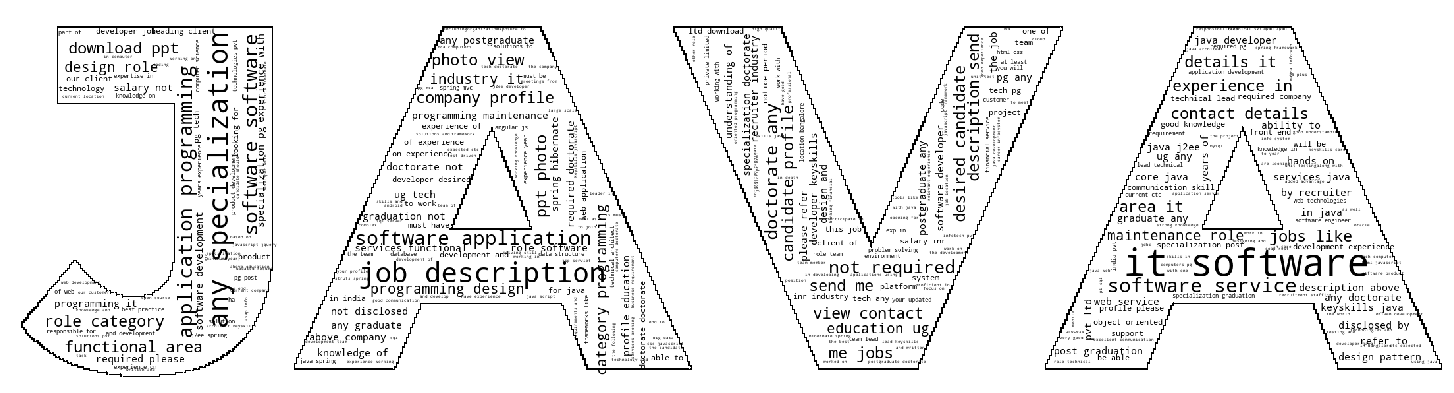

In [5]:
# creating sopt-words
sn_words=['','job description','software', 'company profile', 'not', 'disclosed', 'any specialization',
               'it software', 'jobs', 'candidate', 'desired', 'any','abitity', 'category', 'send', 'contact details']

stopwords = set(stopwords.words('english'))
stopwords = list(stopwords)
stopwords.extend(sn_words)

In [122]:
#collecting all java related text and tokenizing it to input to word-cloud

comment_words = '' 
related_jobs = df_job_descriptions.loc[df_job_descriptions['jobtitle'].str.contains("java")] 

# iterate through the csv file 
for val in related_jobs.jd_combo:  
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "   

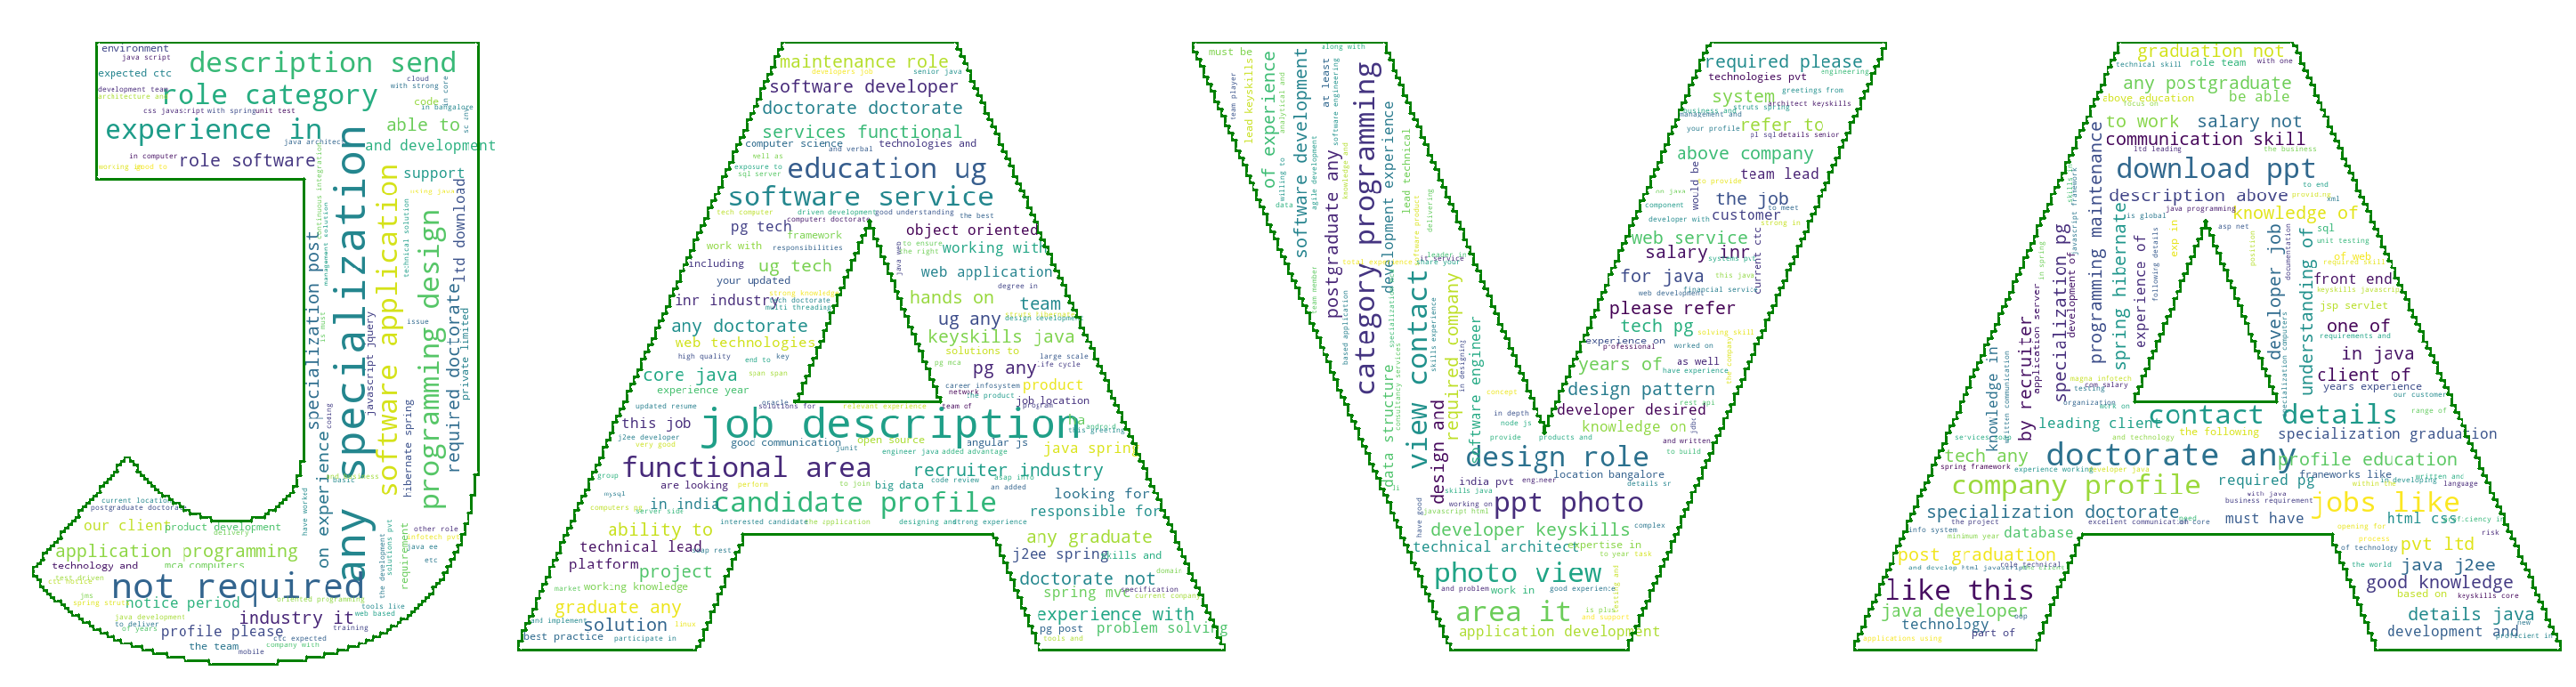

In [125]:
# passing tokens to word-cloud of gerenation and plotting
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
java_mask = np.array(Image.open(path.join(d, "JAVA.png")))
    
wordcloud = WordCloud(max_words=500, mask=java_mask,
                background_color ='white', scale=4,
                contour_color='green', contour_width=.0001, stopwords = stopwords,  
                min_font_size = 2, max_font_size =12).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (40, 40), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Another shot for JAVA

In [12]:
comment_words = '' 
related_jobs = df_job_descriptions.loc[df_job_descriptions['jobtitle'].str.contains("java")] 

# iterate through the csv file 
for val in related_jobs.jd_combo:  
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "  

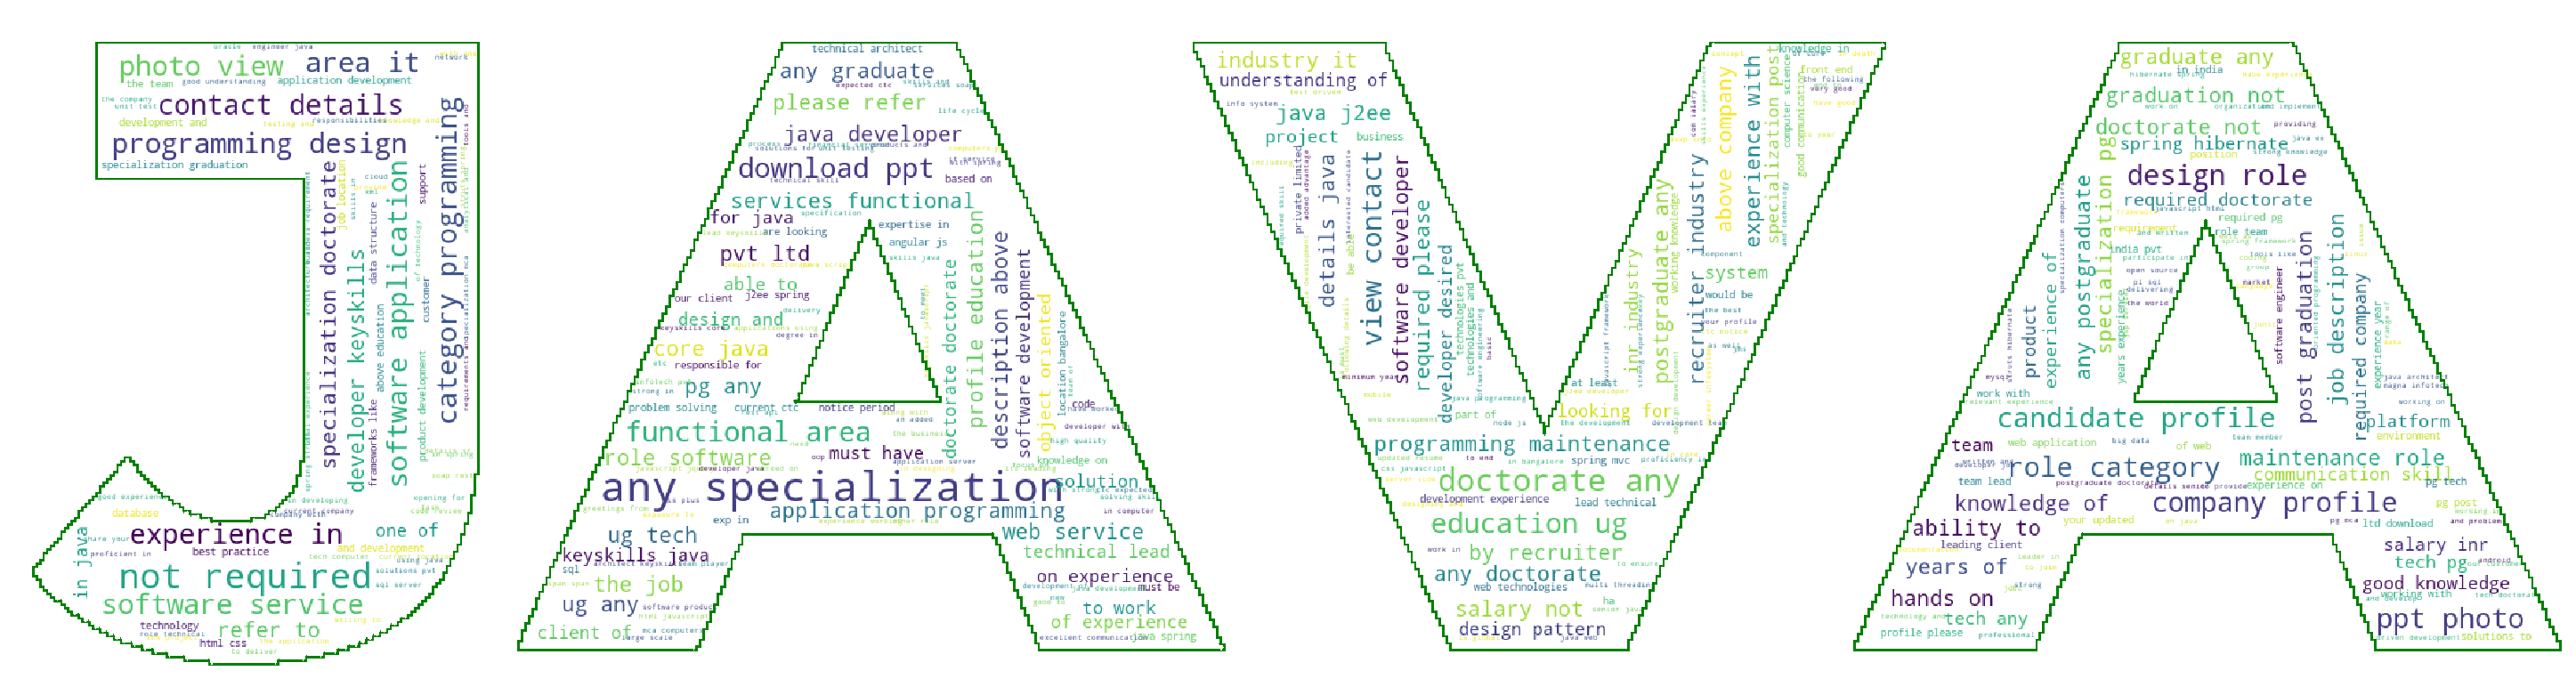

In [14]:
stopwords
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
java_mask = np.array(Image.open(path.join(d, "JAVA.png")))
    
wordcloud = WordCloud(max_words=500, mask=java_mask,
                background_color ='white', scale=3,
                contour_color='green', contour_width=.0001, stopwords = stopwords,  
                min_font_size = 2, max_font_size =12).generate(comment_words) 

# plot the WordCloud image                        
plt.figure(figsize = (40, 40), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Example 2 : PYTHON Logo

#### Same code has been used multiple times to generate clouds for PHP, Oracle etc.....

In [23]:
comment_words = '' 
related_jobs = df_job_descriptions.loc[df_job_descriptions['jobtitle'].str.contains("python")] 

# iterate through the csv file 
for val in related_jobs.jd_combo:  
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" " 

In [75]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()
java_mask = np.array(Image.open(path.join(d, "python0.png")))
    
wordcloud = WordCloud(max_words=600, mask=java_mask,
                background_color ='black', scale=3,stopwords = stopwords,
                contour_color='green', contour_width= .0001,   
                min_font_size = 2, max_font_size =10).generate(comment_words) 




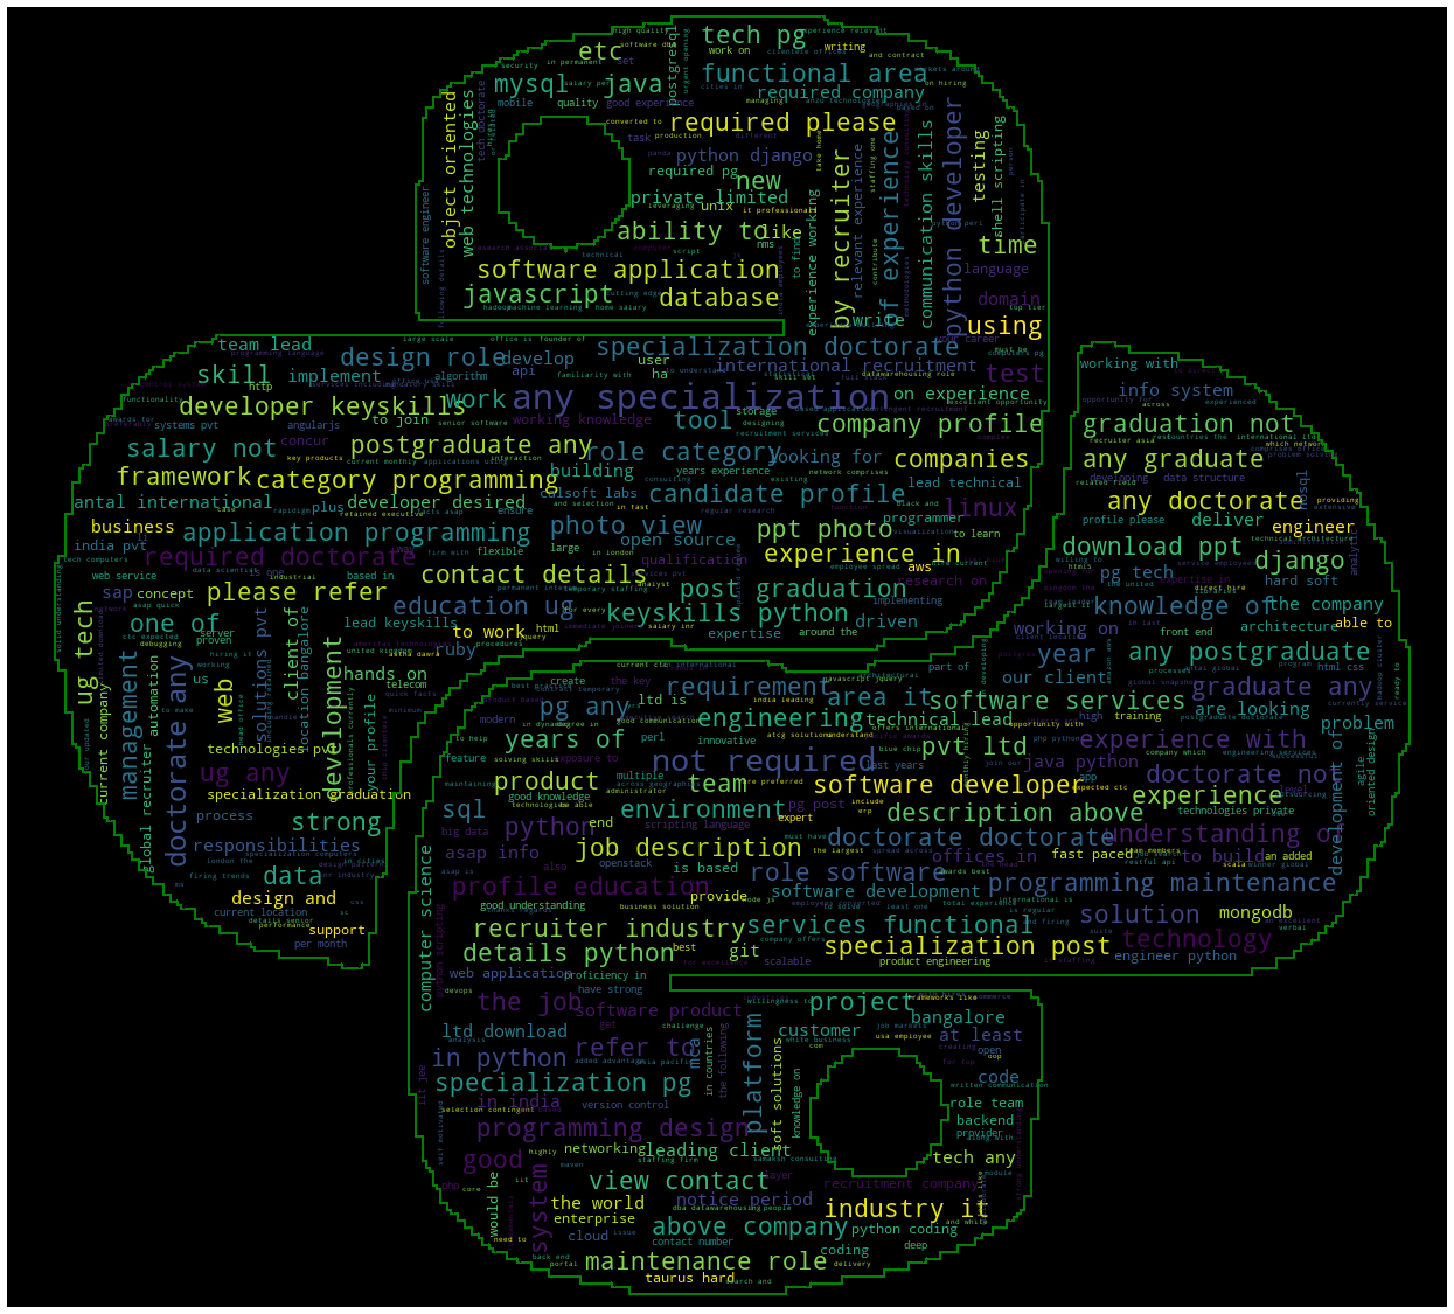

In [76]:
# plot the WordCloud image                        
plt.figure(figsize = (20, 20), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()